In [5]:
# Data manipulation
import pandas as pd
import numpy as np
import math

# Data viz
import seaborn as sns
import matplotlib.pyplot as plt

# Preferences
pd.set_option("display.max_columns", None)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Research/Open Science/Data'

# Read in the data
#raw_data = pd.read_csv("../Data/Open Science_January 21, 2025_16.44.csv")
raw_data = pd.read_csv("Open Science_January 21, 2025_16.44.csv")
raw_data.columns = raw_data.iloc[0, :] # Replace col names with first row
raw_data = raw_data.iloc[2:, :].reset_index(drop=True) # Remove metadata rows

# Use data-dict to make cols easier to work with
#data_dict = pd.read_csv("../Data/data_dict_2.19.25.csv")
data_dict = pd.read_csv("data_dict_2.19.25.csv")
df = raw_data.copy()
data_dict = dict(zip(data_dict['FullName'], data_dict['ShortName']))
df.columns = [data_dict.get(val) for val in list(df)]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Research/Open Science/Data


In [8]:
# CLEAN UP DF
df = df.dropna(subset=['pubs_authored'])
df['pubs_authored'] = df['pubs_authored'].astype(int)
df = df[df['pubs_authored']<200].reset_index(drop=True)

# Drop unnecessary cols
drop_cols = [
    'StartDate',
 'EndDate',
 'ResponseType',
 'Progress',
 'Duration',
 'Finished',
 'RecordedDate',
 'ResponseID',
 'DistributionChannel',
 'UserLanguage',
 'RecaptchaScore',
 'consent',
 'include_in_drawing'
]
plot_df = df.drop(drop_cols, axis=1)

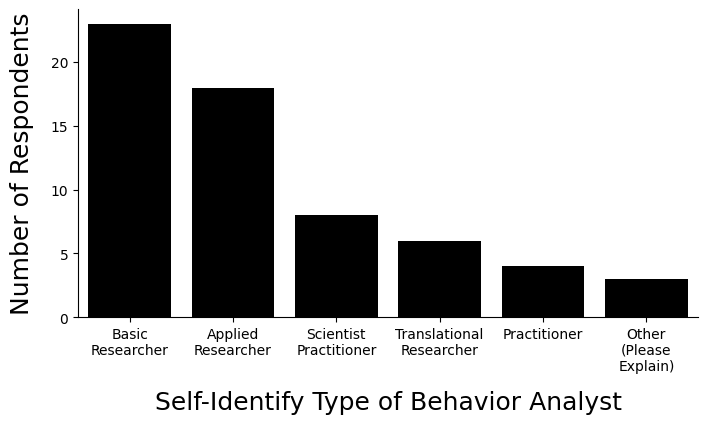

In [9]:
# Prep data
col_val = 'ba_identify'
temp_plot = plot_df[f'{col_val}'].value_counts().reset_index()
temp_plot[f'{col_val}'] = [val.title().replace(" ", "\n").replace("-", "\n") for val in temp_plot[f'{col_val}']]

fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=temp_plot, x=f'{col_val}', y='count', color='k')
plt.ylabel("Number of Respondents", fontsize=18, labelpad=12)
plt.xlabel("Self-Identify Type of Behavior Analyst", fontsize=18, labelpad=12),
sns.despine(top=True, right=True)
plt.show()

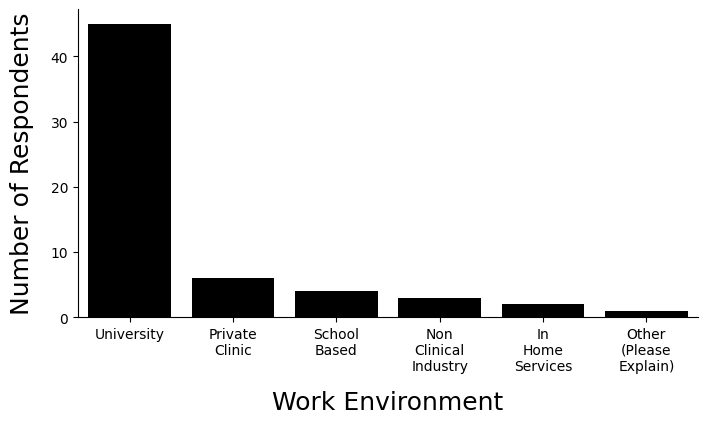

In [10]:
# Prep data
col_val = 'primary_work_setting'
temp_plot = plot_df[f'{col_val}'].value_counts().reset_index()
temp_plot[f'{col_val}'] = [val.title().replace(" ", "\n").replace("-", "\n") for val in temp_plot[f'{col_val}']]

fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=temp_plot, x=f'{col_val}', y='count', color='k')
plt.ylabel("Number of Respondents", fontsize=18, labelpad=12)
plt.xlabel("Work Environment", fontsize=18, labelpad=12),
sns.despine(top=True, right=True)
plt.show()

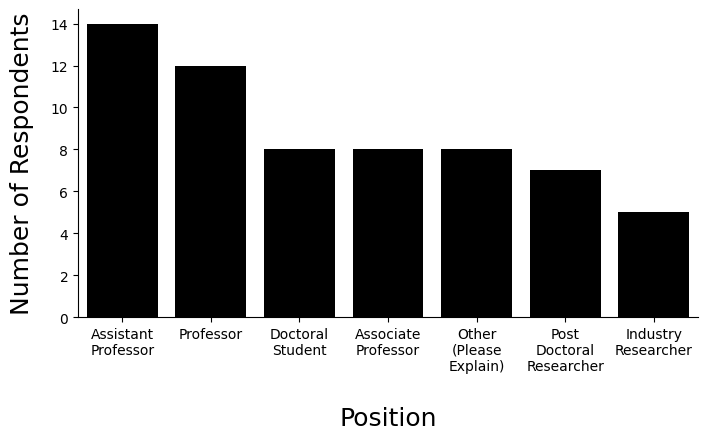

In [11]:
# Prep data
col_val = 'current_position'
temp_plot = plot_df[f'{col_val}'].value_counts().reset_index()
temp_plot[f'{col_val}'] = [val.title().replace(" ", "\n").replace("-", "\n") for val in temp_plot[f'{col_val}']]

fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=temp_plot, x=f'{col_val}', y='count', color='k')
plt.ylabel("Number of Respondents", fontsize=18, labelpad=12)
plt.xlabel("Position", fontsize=18, labelpad=12),
sns.despine(top=True, right=True)
plt.show()

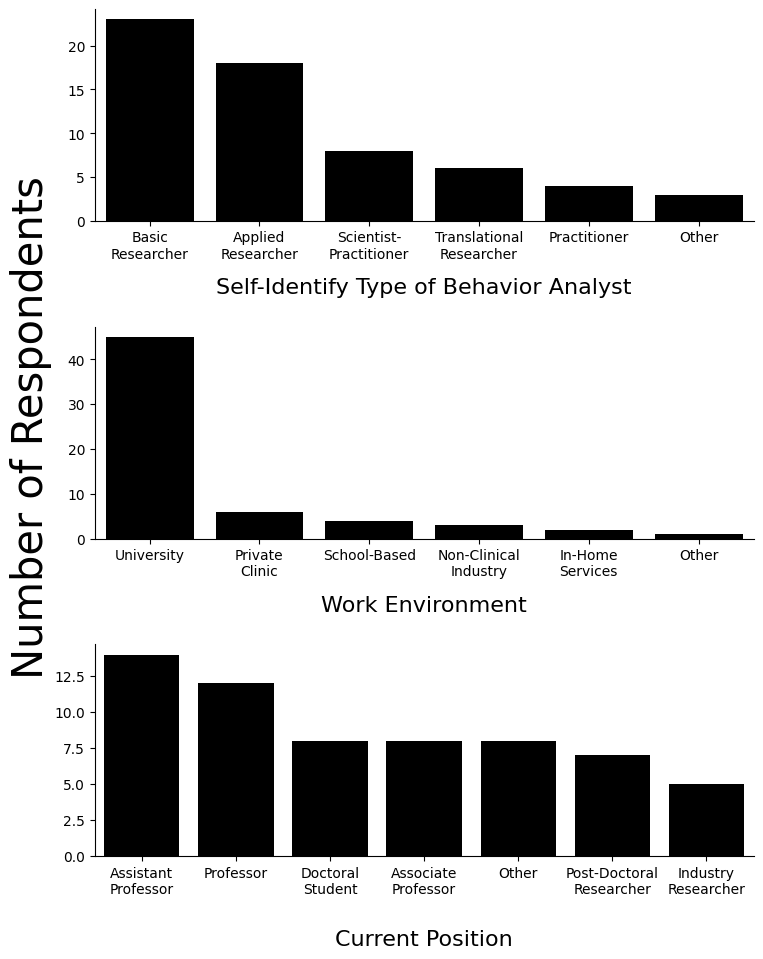

In [12]:
# Define the column names and labels for the plots
columns = [
    ('ba_identify', 'Self-Identify Type of Behavior Analyst'),
    ('primary_work_setting', 'Work Environment'),
    ('current_position', 'Current Position')
]

# Create a 1 column, 3 row subplot
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8.5, 11), constrained_layout=False)

# Adjust space between subplots
fig.subplots_adjust(hspace=0.5)

# Loop through each column and corresponding subplot
for ax, (col_val, xlabel) in zip(axes, columns):
    temp_plot = plot_df[f'{col_val}'].value_counts().reset_index()
    temp_plot[f'{col_val}'] = [val.title().replace("(Please Explain)", "").replace(" ", "\n").replace("Scientist-Practitioner", "Scientist-\nPractitioner") for val in temp_plot[f'{col_val}']]
    sns.barplot(data=temp_plot, x=f'{col_val}', y='count', color='k', ax=ax)
    ax.set_ylabel("", fontsize=20, labelpad=12)
    ax.set_xlabel(xlabel, fontsize=16, labelpad=12)
    sns.despine(ax=ax, top=True, right=True)
fig.text(0.05, 0.5, "Number of Respondents", va='center', ha='center', rotation='vertical', fontsize=30)

plt.savefig("demographics.png")
plt.show()

/tmp/ipython-input-2855641107.py:11: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  bar_plot = sns.barplot(data=temp_df, x='variable', y='value', color='white', errorbar='ci', capsize=0.1, errwidth=1)


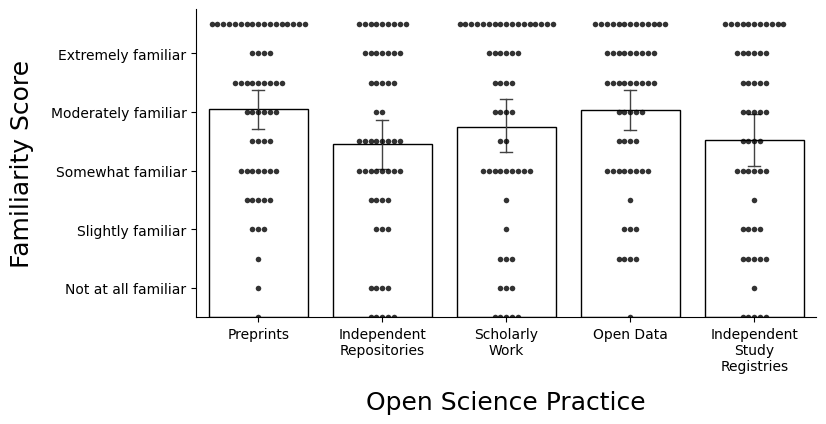

In [13]:
# Prep data
temp_df = plot_df[[val for val in list(plot_df) if "familiar" in val]]
temp_df.columns = ["Preprints", "Independent\nRepositories", "Scholarly\nWork", "Open Data", "Independent\nStudy\nRegistries"]
temp_df = temp_df.melt().dropna().reset_index(drop=True)
temp_df['value'] = temp_df['value'].astype(int)

# Create plot
fig, ax = plt.subplots(figsize=(8, 4))

# Barplot with white bars (color='white')
bar_plot = sns.barplot(data=temp_df, x='variable', y='value', color='white', errorbar='ci', capsize=0.1, errwidth=1)

# Add black edges to bars
for patch in bar_plot.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(1)

# Swarmplot with black markers
sns.swarmplot(data=temp_df, x='variable', y='value', color='black', alpha=0.8, size=4)

# Axis labels and ticks
plt.ylabel("Familiarity Score", fontsize=18, labelpad=12)
plt.yticks(
    ticks=[1, 3, 5, 7, 9],
    labels=['Not at all familiar', 'Slightly familiar', 'Somewhat familiar', 'Moderately familiar', 'Extremely familiar']
)
plt.xlabel("Open Science Practice", fontsize=18, labelpad=12)

# Clean up extra borders
sns.despine(top=True, right=True)

# Save & show
plt.savefig("familiarity.png", dpi=300, bbox_inches="tight")
plt.show()

/tmp/ipython-input-2096399340.py:24: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  bar_plot = sns.barplot(data=temp_df, x='variable', y='value', color='white', errorbar='ci', capsize=0.1, errwidth=1)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 22.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 14.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 19.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/ca

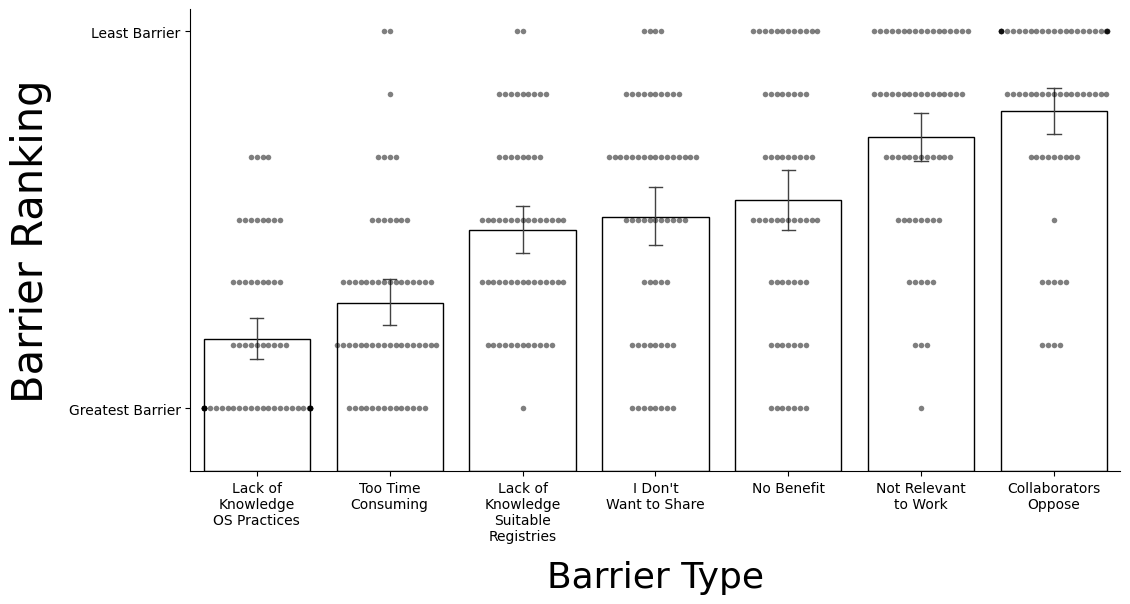

In [14]:
temp_df = plot_df[[val for val in list(plot_df) if "barrier_" in val]]
temp_df.columns = [
    "Lack of\nKnowledge\nOS Practices",
    "Too Time\nConsuming",
    "I Don't\nWant to Share",
    "Lack of\nKnowledge\nSuitable\nRegistries",
    "Not Relevant\nto Work",
    "Collaborators\nOppose",
    "No Benefit"
]
temp_df = temp_df.melt().dropna().reset_index(drop=True)

# Prep data
temp_df['value'] = temp_df['value'].astype(int)


# Reorder categories based on mean values
mean_order = temp_df.groupby('variable')['value'].mean().sort_values()
temp_df['variable'] = pd.Categorical(temp_df['variable'], categories=mean_order.index, ordered=True)

fig, ax = plt.subplots(figsize=(12, 6))

# Barplot with white fill
bar_plot = sns.barplot(data=temp_df, x='variable', y='value', color='white', errorbar='ci', capsize=0.1, errwidth=1)

# Add black edges to bars
for patch in bar_plot.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(1)

sns.swarmplot(data=temp_df, x='variable', y='value', color='black', alpha=0.5, size=4)
plt.ylabel("Barrier Ranking", fontsize=30, labelpad=12)
plt.yticks(
    ticks=[1, 7],
    labels=['Greatest Barrier', 'Least Barrier']
)
plt.xlabel("Barrier Type", fontsize=26, labelpad=12),
sns.despine(top=True, right=True)
#plt.savefig("barriers.png")
plt.savefig("barriers.png",dpi=300, bbox_inches = "tight")
plt.show()

/tmp/ipython-input-3267562738.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['current_position'] = ["More Senior" if val in senior_career else "Early Career" for val in temp_df['current_position']]
/tmp/ipython-input-3267562738.py:52: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.barplot(data=subset, x='current_position', y='value', ax=ax,
/tmp/ipython-input-3267562738.py:52: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.barplot(data=subset, x='current_position', y='value', ax=ax,
/tmp/ipython-input-3267562738.py:52: FutureWarning: 

The `errwidth` parame

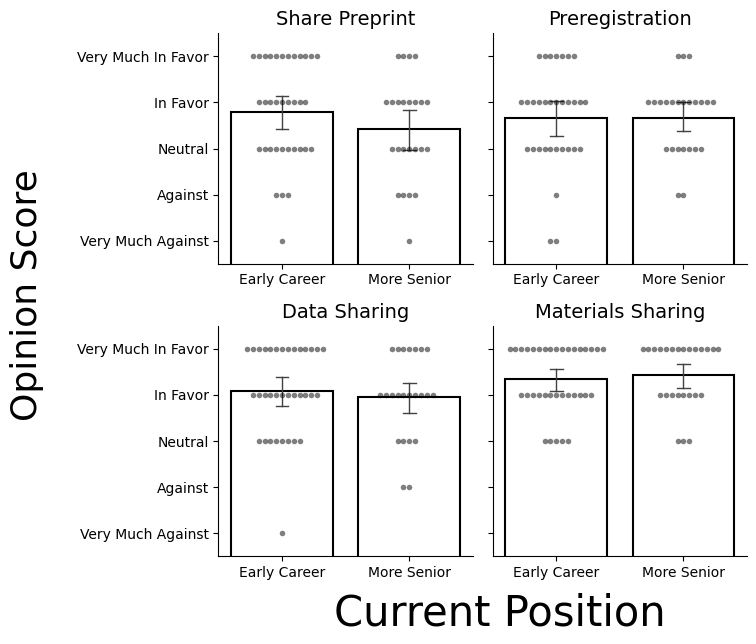

In [15]:
temp_df = plot_df[[val for val in list(plot_df) if "your_opinion" in val]+ ['current_position']]
senior_career = ['Associate Professor', 'Professor', 'Industry Researcher']
temp_df['current_position'] = ["More Senior" if val in senior_career else "Early Career" for val in temp_df['current_position']]
temp_df.columns = [
    "Share Preprint",
    "Preregistration",
    "Data Sharing",
    "Materials Sharing",
    "current_position"
]
temp_df = temp_df.melt(id_vars=['current_position']).dropna().reset_index(drop=True)

# Swap out Opinion label for numeric
swap_dict = {
    'Very much in favor': 5,
    'In favor': 4,
    'Neither in favor nor against (i.e., neutral)': 3,
    'Against': 2,
    'Very much against': 1,
    'No opinion (i.e., I did not know anything about sharing data before this survey': -1,
}
temp_df['value'] = temp_df['value'].map(swap_dict)
temp_df = temp_df.dropna(subset=['value'])
temp_df['value'] = temp_df['value'].astype(int)
temp_df

# Filter out rows where 'value' is -1 and count the "No opinion" respondents
no_opinion_counts = temp_df[temp_df['value'] == -1].groupby('variable').size()
temp_df_filtered = temp_df[temp_df['value'] != -1]

# Get the unique variables
unique_variables = temp_df_filtered['variable'].unique()

# Calculate rows and columns for a 2x2 grid
num_plots = len(unique_variables)
rows = math.ceil(num_plots / 2)
cols = 2

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(7, 6), sharey=True)
axes = axes.flatten()

# Adjust space between subplots
fig.subplots_adjust(hspace=0.8)  # Increased vertical space

# Plot each variable in a separate subplot
for idx, (ax, variable) in enumerate(zip(axes, unique_variables)):
    # Subset the data for the current variable
    subset = temp_df_filtered[temp_df_filtered['variable'] == variable]

    # Create a barplot
    sns.barplot(data=subset, x='current_position', y='value', ax=ax,
                errorbar='ci', capsize=0.1, errwidth=1,
                color='white', edgecolor='black', linewidth=1.5)
    sns.swarmplot(data=subset, x='current_position', y='value', ax=ax, color='black', alpha=0.5, size=4)

    # Set axis labels and title
    ax.set_title(variable, fontsize=14)
    ax.set_ylabel("", fontsize=12)
    ax.set_ylim(0.5, 5.5)
    ax.set_yticks([1, 2, 3, 4, 5])
    ax.set_yticklabels(['Very Much Against', 'Against', 'Neutral', 'In Favor', 'Very Much In Favor'], fontsize=10)
    ax.set_xlabel("", fontsize=12)
    sns.despine(top=True, right=True)

# Remove any empty subplots
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

# Add shared labels
fig.text(0.625, -0.05, "Current Position", ha='center', fontsize=30)
fig.text(-0.05, 0.5, "Opinion Score", va='center', ha='center', rotation='vertical', fontsize=26)

plt.tight_layout()
plt.savefig("opinion_by_career.png")
plt.show()

In [16]:
#export as CSV
df.to_csv('og_df.csv',index=False)

#Create a table with calculated percentages.

In [17]:
# function to get percentages
def get_percentage_respondents(df, col):
  # Calculate the count of respondents for each category
  category_counts = df[col].value_counts()
  #
  total_missing = df[col].isna().sum()

  # Calculate the total number of respondents
  total_respondents = len(df)

  # Calculate the percentage of respondents for each
  category_percentages = (category_counts / (total_respondents - total_missing)) * 100

  category_percentages = category_percentages.reset_index()

  category_percentages['question_name'] = list(category_percentages)[0]
  category_percentages.columns = ['options', 'count', 'question_name']

  return category_percentages


In [18]:
#specifying specific columns instead of whole data frame
df_percents = df[['experience_os_practices', 'familiarity_preprint',
'familiarity_ind_repo', 'familiarity_scholarly_work', 'familiarity_open_data',
'familiarity_inde_study_registry', 'your_opinion_share_preprint',
'knowledge_preprints_ind_repo', 'pubs_ind_repo_preprint', 'year_first_preprint_share',
'recent_pub_a_preprint', 'reasons_hesitate_preprint', 'reasons_hesitate_preprint_other',
'est_percent_colleagues_share', 'your_opinion_prereg', 'knowledge_prereg',
'pubs_prereg', 'year_first_prereg', 'reasons_hesitate_prereg','reasons_hesitate_prereg_other',
'recent_pub_prereg', 'est_percent_colleagues_prereg', 'your_opinion_data_share',
'knowledge_ind_repo', 'pubs_ind_repo_shared', 'year_first_ind_repo', 'reasons_hesitate_ind_repo',
'reasons_hesitate_ind_repo_other', 'recent_pub_ind_repo', 'est_percent_colleagues_ind_repo',
'your_opinion_share_materials', 'pubs_share_materials', 'year_first_share_materials',
'how_share_materials',  'how_share_materials_other', 'reasons_hesitate_share_materials',
'reasons_hesitate_share_materials_other', 'recent_pub_share_materials',
'est_percent_colleagues_share_materials', 'barrier_knowledge_os_practices',
'barrier_time_consuming_support', 'barrier_researchers_no_share',
'barrier_knowledge_registries', 'barrier_not_relevant', 'barrier_collaborator_opposition',
'barrier_no_benefit', 'barriers_experienced', 'increase_knowledge_include_grad_training',
'increase_knowledge_support_superiors', 'increase_knowledge_workshops',
'increase_knowledge_webinars', 'increase_knowledge_article_tutorials',
'increase_knowledge_resource_access', 'rank_impact_include_grad_training',
'rank_impact_support_superiors', 'rank_impact_workshops', 'rank_impact_webinars',
'rank_impact_article_tutorials', 'rank_impact_resource_access',
'sources_you_learned_from', 'sources_you_learned_from_other', 'how_like_learn_more',
'how_like_learn_more_other', 'plan_to_post_preprint', 'plan_to_read_preprint',
'plan_make_data_open', 'plan_access_open_data', 'plan_to_prereg', 'plan_read_prereg',
'research_conducted', 'research_conducted_other', 'years_current_position', 'ba_identify',
                  'ba_identify_other'

                  ]]

percent_df = pd.DataFrame()

for col in list(df_percents):
  data_perc = get_percentage_respondents(df, col)
  percent_df = pd.concat([percent_df, data_perc],axis = 0)
#df_percents.iloc[:,:3]

#export as CSV
percent_df.to_csv('percentage_results_new.csv',index=False)


In [19]:
#comparing barriers for career stage
df = plot_df.copy()
POSITION_COL = 'current_position'
BARRIER_PREFIX = 'barrier_'   # all barrier columns start with this
SENIOR_TITLES = {'Associate Professor', 'Professor', 'Industry Researcher'}

# ---- identify barrier columns and coerce numeric ----
barrier_cols = [c for c in df.columns if c.startswith(BARRIER_PREFIX)]
if not barrier_cols:
    raise ValueError("No columns starting with 'barrier_' were found. Confirm your column names.")
for c in barrier_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# ---- map to Early vs Senior ----
df['career_stage'] = np.where(df[POSITION_COL].isin(SENIOR_TITLES), 'Senior', 'Early')

# ---- helper: percentage endorsed by group ----
def pct_endorsed(frame, barrier_col, stage_col='career_stage', rule='top2'):
    s = frame[[stage_col, barrier_col]].dropna()
    if rule == 'top2':
        endorsed = s[barrier_col].isin([1, 2]).astype(int)
    elif rule == 'top3':
        endorsed = s[barrier_col].isin([1, 2, 3]).astype(int)
    else:
        raise ValueError("rule must be 'top2' or 'top3'")
    s = s.assign(endorsed=endorsed)
    out = s.groupby(stage_col)['endorsed'].agg(['count','mean']).reset_index()
    out['percent'] = (out['mean'] * 100).round(1)
    out = out.rename(columns={'count':'n'}).drop(columns='mean')
    return out

# ---- build tables ----
rows_top2, rows_top3 = [], []
for col in barrier_cols:
    pretty = (col.replace('barrier_', '')
                .replace('_', ' ')
                .title()
                .replace('Os', 'OS'))
    t2 = pct_endorsed(df, col, 'career_stage', rule='top2')
    t2['Barrier'] = pretty; t2['barrier_var'] = col
    rows_top2.append(t2)

    t3 = pct_endorsed(df, col, 'career_stage', rule='top3')
    t3['Barrier'] = pretty; t3['barrier_var'] = col
    rows_top3.append(t3)

tab_top2 = pd.concat(rows_top2, ignore_index=True)
tab_top3 = pd.concat(rows_top3, ignore_index=True)

# ---- tidy side-by-side tables; force two-decimal % for BOTH groups ----
def pivot_wide(tab):
    wide_pct = tab.pivot(index=['Barrier','barrier_var'], columns='career_stage', values='percent').reset_index()
    wide_n   = tab.pivot(index=['Barrier','barrier_var'], columns='career_stage', values='n').reset_index()

    # Merge; percent cols get '_%' and n cols get '_n'
    out = wide_pct.merge(wide_n, on=['Barrier','barrier_var'], suffixes=('_%','_n'))

    # Normalize column names (strip stray spaces)
    out.columns = [c.strip() for c in out.columns]

    # Find BOTH Early and Senior percent columns robustly
    pct_cols = [c for c in out.columns if c.lower().endswith('_%')]
    # Coerce to numeric then round to two decimals
    out[pct_cols] = out[pct_cols].apply(pd.to_numeric, errors='coerce').round(2)

    # Ensure n columns are integer dtype
    n_cols = [c for c in out.columns if c.lower().endswith('_n')]
    for c in n_cols:
        out[c] = pd.to_numeric(out[c], errors='coerce').astype('Int64')

    return out.sort_values('Barrier').reset_index(drop=True)

top2_wide = pivot_wide(tab_top2)
top3_wide = pivot_wide(tab_top3)

# ---- pretty print with two-decimal formatting for BOTH Early_% and Senior_% ----
def print_two_decimals(df):
    fmt_cols = {c: (lambda x: f"{x:.2f}" if pd.notna(x) else "")
                for c in df.columns if c.lower().endswith('_%')}
    print(df.to_string(index=False, formatters=fmt_cols))

print("Barrier endorsement (Top-2: rated 1–2 = greatest barrier) — Early vs Senior")
print_two_decimals(top2_wide)

print("\nBarrier endorsement (Top-3: rated 1–3) — Early vs Senior")
print_two_decimals(top3_wide)


Barrier endorsement (Top-2: rated 1–2 = greatest barrier) — Early vs Senior
                Barrier                     barrier_var Early_% Senior_%  Early_n  Senior_n
Collaborator Opposition barrier_collaborator_opposition    5.40     8.00       37        25
 Knowledge OS Practices  barrier_knowledge_os_practices   64.90    68.00       37        25
   Knowledge Registries    barrier_knowledge_registries   18.90    24.00       37        25
             No Benefit              barrier_no_benefit   27.00    16.00       37        25
           Not Relevant            barrier_not_relevant    5.40     8.00       37        25
   Researchers No Share    barrier_researchers_no_share   32.40    16.00       37        25
 Time Consuming Support  barrier_time_consuming_support   45.90    60.00       37        25

Barrier endorsement (Top-3: rated 1–3) — Early vs Senior
                Barrier                     barrier_var Early_% Senior_%  Early_n  Senior_n
Collaborator Opposition barrier_collab

In [20]:
IDENTITY_COL = "ba_identify"        # e.g., "basic researcher", "applied researcher", etc.
CAREER_STAGE_COL = "career_stage"       # e.g., "early", "mid", "senior" (or your labels)

# Engagement columns you specified (most recent publication)
ENGAGEMENT_COLS = {
    "preregistration": "recent_pub_prereg",
    "independent_repository": "recent_pub_ind_repo",
    "preprint": "recent_pub_a_preprint",
    "materials_sharing": "recent_pub_share_materials",
}

IDENTITY_SYNONYMS = {
    "basic researcher": {"basic", "basic researcher", "basic science"},
    "applied researcher": {"applied", "applied researcher"},
    "translational researcher": {"translational", "translational researcher"},
    "scientist-practitioner": {"scientist practitioner", "scientist-practitioner", "scientist_practitioner"},
    "practitioner": {"practitioner", "clinician", "clinical practitioner"},
    "other": {"other", "na", "n/a", ""},
}

CAREER_STAGE_MAP = {
    "doctoral student": "early",
    "post doctoral researcher": "early",
    "assistant professor": "early",
    "associate professor": "senior",
    "professor": "senior",
    "industry researcher": "senior",
}


# Values that count as “engaged”
POSITIVE_USED = {"yes"}

# ---------- Helpers ----------
def canonicalize(x):
    if pd.isna(x): return ""
    return str(x).strip().lower()

def map_identity(x):
    v = canonicalize(x)
    for canon, syns in IDENTITY_SYNONYMS.items():
        if v in {canonicalize(s) for s in syns}:
            return canon
    return x if v else "other"

def map_stage(x):
    if not CAREER_STAGE_MAP:
        return x
    v = canonicalize(x)
    for raw, canon in CAREER_STAGE_MAP.items():
        if canonicalize(raw) == v:
            return canon
    return x

def to_binary(val):
    if pd.isna(val): return 0
    v = canonicalize(val)
    if v in POSITIVE_USED: return 1
    if v.isdigit(): return 1 if int(v) > 0 else 0
    return 0

def pct(x):
    return round(100 * x, 2)

# ---------- Copy & prepare ----------
_work = df.copy()

# Standardize identity & stage
_work["_identity"] = _work[IDENTITY_COL].apply(map_identity).astype(str)
_work["_stage"] = _work[CAREER_STAGE_COL].apply(map_stage).astype(str)

# Create engagement flags
for practice, col in ENGAGEMENT_COLS.items():
    if col not in _work.columns:
        raise ValueError(f"Missing expected column: {col} (for {practice})")
    _work[f"engaged_{practice}"] = _work[col].apply(to_binary)

# ---------- Output 1: % by researcher type ----------
from functools import reduce

pieces = []
for practice in ENGAGEMENT_COLS.keys():
    s = (
        _work.groupby("_identity")[f"engaged_{practice}"]
             .mean()
             .map(pct)
             .rename(f"{practice}_percent")
             .reset_index()
    )
    pieces.append(s)

percent_by_researcher_type = reduce(lambda L, R: pd.merge(L, R, on="_identity", how="outer"), pieces)
percent_by_researcher_type = percent_by_researcher_type.sort_values("_identity").reset_index(drop=True)

# ---------- Output 2: % by researcher type × career stage (long) ----------
rows = []
for practice in ENGAGEMENT_COLS.keys():
    g = _work.groupby(["_identity", "_stage"], dropna=False)[f"engaged_{practice}"]
    out = g.agg(n="count", engaged_n="sum", pct=lambda s: pct(s.mean())).reset_index()
    out = out.rename(columns={"_identity": "researcher_type", "_stage": "career_stage"})
    out["practice"] = practice
    rows.append(out)

percent_by_type_and_stage = pd.concat(rows, ignore_index=True)[
    ["practice", "researcher_type", "career_stage", "n", "engaged_n", "pct"]
].sort_values(["practice", "researcher_type", "career_stage"]).reset_index(drop=True)

# ---------- Quick peek ----------
print("\n% by researcher type:")
print(percent_by_researcher_type)

print("\n% by researcher type × career stage × practice:")
print(percent_by_type_and_stage)

# ---------- Helper to craft sentences ----------
def example_sentence(practice="preprint", rtype="applied researcher", stage="early"):
    mapping = {
        "preprint": "published a preprint",
        "preregistration": "preregistered a study",
        "materials_sharing": "shared materials",
        "independent_repository": "used an independent repository",
    }
    row = percent_by_type_and_stage[
        (percent_by_type_and_stage["practice"] == practice) &
        (percent_by_type_and_stage["researcher_type"] == rtype) &
        (percent_by_type_and_stage["career_stage"] == stage)
    ]
    if len(row):
        val = row.iloc[0]["pct"]
        return f"{val}% of {rtype}, {stage}-career respondents reported they {mapping.get(practice, 'engaged') } in their most recent publication."
    return "No matching combination found."



% by researcher type:
                  _identity  preregistration_percent  \
0    Other (please explain)                    33.33   
1        applied researcher                    22.22   
2          basic researcher                    34.78   
3              practitioner                     0.00   
4    scientist-practitioner                    12.50   
5  translational researcher                     0.00   

   independent_repository_percent  preprint_percent  materials_sharing_percent  
0                           33.33              0.00                       0.00  
1                           16.67             27.78                      72.22  
2                           56.52             43.48                      47.83  
3                            0.00              0.00                       0.00  
4                            0.00             12.50                      62.50  
5                           33.33             16.67                      83.33  

% by researcher 

In [21]:
#Compare engagement and type of research conducted

# --- columns that indicate open science engagement ---
practice_cols = [
    "recent_pub_prereg",
    "recent_pub_ind_repo",
    "recent_pub_a_preprint",
    "recent_pub_share_materials",
]

# --- map long text to shorter research-type labels ---
research_map = {
    "I mainly conduct single-case design research": "SCED",
    "I mainly conduct group design research": "Group",
    "I mainly conduct systematic reviews and meta-analyses": "SysRev-Meta",
    "Other (Please explain)": "Mixed-Other",
}

df["research_type"] = df["research_conducted"].map(research_map).fillna(df["research_conducted"])

# --- normalize Yes/No and coerce everything to numeric ---
yes_no_map = {
    "Yes": 1, "No": 0,
    "Yes ": 1, "No ": 0,  # catches trailing spaces
}

df[practice_cols] = (
    df[practice_cols]
      .replace(yes_no_map)                      # map strings to 1/0/NaN
      .apply(pd.to_numeric, errors="coerce")    # convert any remaining strings to NaN
)

# --- percentage within each research type using each practice ---
pct_by_research_type = (
    df.dropna(subset=["research_type"])
      .groupby("research_type")[practice_cols]
      .mean()        # mean of 0/1 = proportion
      .mul(100)      # convert to %
      .round(2)      # two decimal place
)

print(pct_by_research_type)



               recent_pub_prereg  recent_pub_ind_repo  recent_pub_a_preprint  \
research_type                                                                  
Group                      46.67                66.67                  60.00   
Mixed-Other                28.57                37.50                  25.00   
SCED                        3.85                14.81                  15.38   
SysRev-Meta                80.00                40.00                  40.00   

               recent_pub_share_materials  
research_type                              
Group                               71.43  
Mixed-Other                         57.14  
SCED                                69.57  
SysRev-Meta                        100.00  
